title: '머신러닝3 회귀알고리즘'

date: '2022-06-30 14:00'


##  K- 최근접 이웃 회귀
- 지도학습 알고리즘은 크게 분류와 회귀
- 지도 학습 : 종속변수 존재
 + 분류 : 도미와 빙어 분류 문제 해결
 + 회귀 : 통계 회귀분석 y = ax + b


## 데이터 불러오기

In [42]:
import numpy as np
print(np.__version__)

1.21.6


In [20]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

<function matplotlib.pyplot.show>

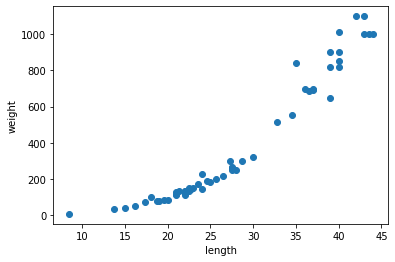

In [11]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots() # 객체지향의 시작
ax.scatter(perch_length,perch_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show


In [43]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape
print(train_input.ndim)

1


- 1차원 배열-> 2차원 배열


In [29]:
train_input = train_input. reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)
print(train_input.ndim)

(42, 1) (14, 1)
2


## 결정계수
- Adjusted -R Squared
- 정확한 지표(0~1)
- 1에 가까울수록 예측 모형이 예측을 잘한다.

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

#모형학습
knr.fit(train_input,train_target)

#테스트 세트의 점수를 확인한다
print(knr.score(test_input,test_target))

0.992809406101064


In [36]:
from sklearn.metrics import mean_absolute_error

#예측 데이터
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


- 예측이 평균적으로 19g정도 다르다.
 + 확실한 것은 오차가 존재하는데 19g이 의미하는 것은 무엇인가?
   - 오차를 줄일 필요가 있음(더 많은 데이터를 모으거나 알고리즘을 바꿔야 함)
 + 개선을 지속적으로 하여 0g이 될때까지

In [37]:
print(knr.score(train_input, train_target))

0.9698823289099254


## 과대적합 vs 과소적합
- 매우 힘듬. 도망가고 싶음(모형 설계가 잘못됨)
- 과대적합 : 훈련세트는 점수 좋으나 테스트 점수가 매우 안좋음
- 과소적합 : 테스트세트의 점수가 매우 좋음
- 결론 : 제대로 모형이 훈련이 안된 것이기에 모형 서비스에 탑재 불가.

In [39]:
print("훈련평가:",knr.score(train_input,train_target))
print("테스트평가:",knr.score(test_input,test_target))# 테스트세트 점수가 좋기에 과소적합

훈련평가: 0.9698823289099254
테스트평가: 0.992809406101064


- 모형개선 

In [40]:
# 이웃의 갯수를 3으로 재 지정
knr.n_neighbors = 3

# 모형 다시 훈련
knr.fit(train_input, train_target)
print("훈련 평가:",knr.score(train_input,train_target))
print("테스트 평가:",knr.score(test_input, test_target))

훈련 평가: 0.9804899950518966
테스트 평가: 0.9746459963987609
